In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


from bokeh.io import show, output_file, output_notebook
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4


%matplotlib inline

plt.style.use("ggplot")

output_notebook() 

Loading BokehJS ...

In [2]:
users = pd.read_csv("SELECT_u_name__ST_X_chap_location__geome.csv", 
                    header = None, names = ["user", "long", "lat"])

In [3]:
edges = pd.read_csv("SELECT_Z_auth_A__Z_auth_B__sum_1__as_cnt.csv")

In [4]:
users.head()

,user,long,lat
0,dollarmapper,11.151678,7.655859
1,muhaammaadd,11.151678,7.655859
2,hauwa_u,11.151678,7.655859
3,kenbayona,-6.766168,39.215414
4,ayebare lucky,0.547058,34.020155


In [5]:
edges.head()

,auth_a,auth_b,cnt
0,--t7tr--,danielzyt,4962
1,--t7tr--,hills95,9744
2,--t7tr--,kiggudde,107
3,--t7tr--,livasa,237
4,--t7tr--,mugabi henry,12


In [6]:
#edges_users = pd.merge(edges, users, 
#         left_on = "auth_a",
#         right_on = "user")\
#.drop("user", axis = 1)

In [7]:
G = nx.DiGraph()

In [8]:
# Only add edges that would have counts > 1000
edge_tuples = [tuple(x) for x in edges.values 
               if x[-1] > 1000]

In [9]:
G.add_weighted_edges_from(edge_tuples)

/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

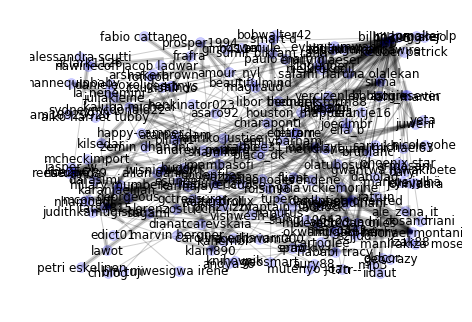

In [10]:
options = {
    "node_color": "blue",
    "node_size": 100,
    "width": 1,
    "alpha": .2
}

nx.draw_random(G, **options, with_labels = True)
plt.savefig("full_user_network.png")

/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

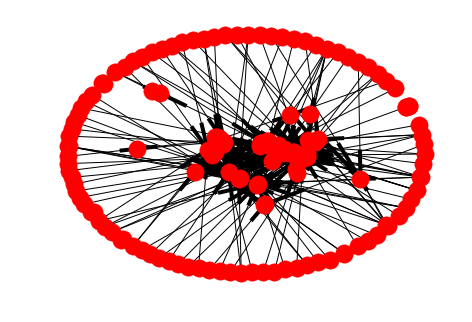

In [11]:
pos = nx.spring_layout(G,scale=2)

nx.draw(G,pos,font_size=8)
plt.show()

In [19]:
plot = figure(title="Youth Street Mapper Connections", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

#output_file("networkx_graph.html")
show(plot)


In [21]:
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Youth Street Mapper Connections"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

#output_file("interactive_graphs.html")
show(plot)

/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

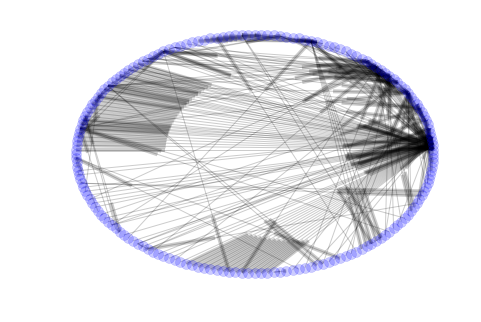

In [14]:
nx.draw_circular(G, **options)

/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/vnxiclaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

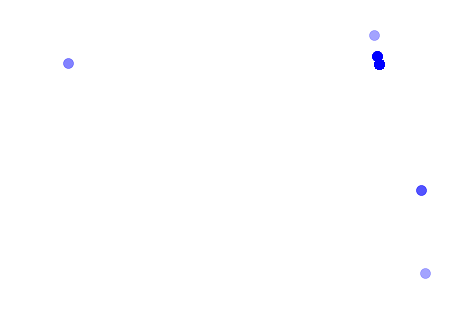

In [15]:
nx.draw_spectral(G, **options)

In [16]:
auth_a1_net = edges.loc[edges.auth_a == "--t7tr--", 
                       edges.columns[:2]]

In [17]:
#auth_a1_nodes = (auth_a_net.auth_a.append(auth_a_net.auth_b)).unique()

In [18]:
auth_a1_nodes

NameError: name 'auth_a1_nodes' is not defined

In [ ]:
sub_G = G.subgraph(auth_a1_nodes)

In [ ]:
sub_G.edges()

In [ ]:
nx.draw_random(sub_G, **options, with_labels = True)
plt.savefig("subgraph_with_--t7tr--.png")

In [ ]:
nx.write_gml(G, "youthmappers.gml")